In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-song-performance-dataset/spotify_data.csv


In [2]:
df=pd.read_csv("/kaggle/input/spotify-song-performance-dataset/spotify_data.csv")

# A LOOK AT THE DATA 

In [3]:
df.head()

,Songs & Artist,Streams,Daily
0,The Weeknd - Blinding Lights,4463658617,1619447.0
1,Ed Sheeran - Shape of You,4018102402,1001507.0
2,Lewis Capaldi - Someone You Loved,3588673578,1506961.0
3,Harry Styles - As It Was,3544187311,1611374.0
4,Post Malone - Sunflower,3518744128,1337404.0


## Check for null values

In [4]:
df.isnull().sum()

Songs & Artist    0
Streams           0
Daily             2
dtype: int64

#### Daily has 2 null values. We can drop those records 

In [5]:
df.dropna(inplace=True)

### Final Record Count post Null removal

In [6]:
df.shape

(2498, 3)

### DATA PREPROCESSING

Let us first separate the song and artist

In [7]:
df['Artist']=df['Songs & Artist'].apply(lambda s:s.split("-")[0])
df['Song']=df['Songs & Artist'].apply(lambda s:s.split("-")[1])
df.drop(columns=['Songs & Artist'],inplace=True)

In [8]:
df=df[['Song','Artist','Streams','Daily']]

In [9]:
df.head()

,Song,Artist,Streams,Daily
0,Blinding Lights,The Weeknd,4463658617,1619447.0
1,Shape of You,Ed Sheeran,4018102402,1001507.0
2,Someone You Loved,Lewis Capaldi,3588673578,1506961.0
3,As It Was,Harry Styles,3544187311,1611374.0
4,Sunflower,Post Malone,3518744128,1337404.0


## Exploratory Data Analysis

### Let us find the top Artists and Songs

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df2=df.groupby("Artist").agg({"Streams":"mean"}).reset_index().sort_values(by="Streams",ascending=False)

<Axes: title={'center': 'TOP 10 ARTISTS BASED ON STREAMING COUNTS'}, xlabel='Artist', ylabel='Streams'>

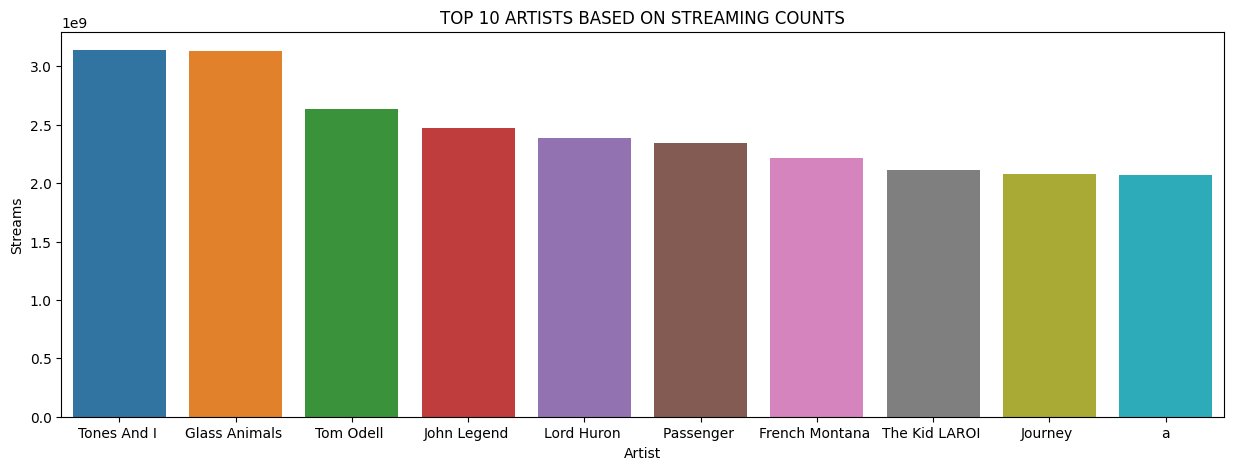

In [12]:
df2=df.groupby("Artist").agg({"Streams":"mean"}).reset_index().sort_values(by="Streams",ascending=False)
plt.figure(figsize=(15,5))
plt.title("TOP 10 ARTISTS BASED ON STREAMING COUNTS")
sns.barplot(x='Artist',y='Streams',data=df2.head(10))

### TOP ARTISTS BASED ON THEIR DAILY STREAMING ACTIVITY

<Axes: title={'center': 'TOP 10 ARTISTS BASED ON DAILY COUNTS'}, xlabel='Artist', ylabel='Daily'>

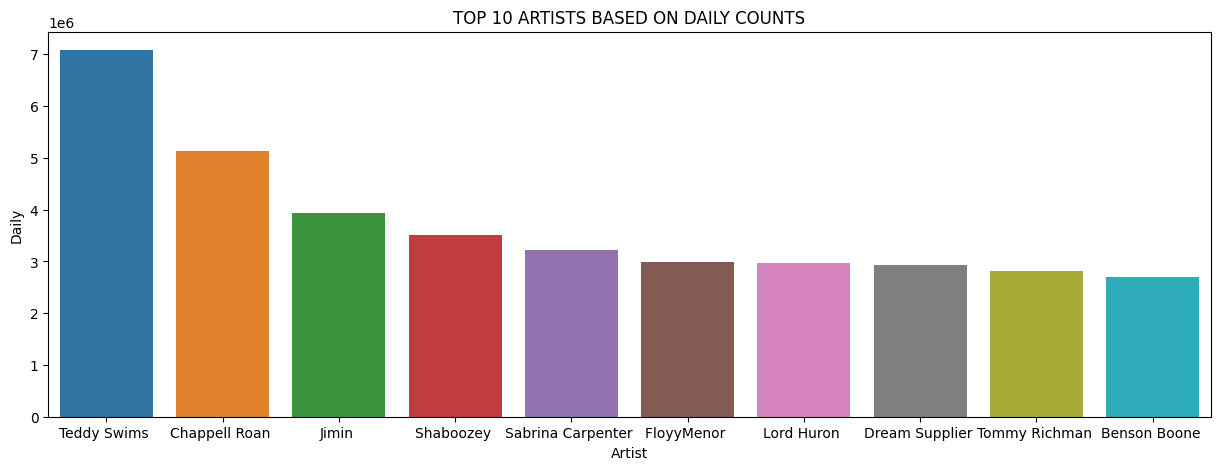

In [13]:
df2=df.groupby("Artist").agg({"Daily":"mean"}).reset_index().sort_values(by="Daily",ascending=False)
plt.figure(figsize=(15,5))
plt.title("TOP 10 ARTISTS BASED ON DAILY COUNTS")
sns.barplot(x='Artist',y='Daily',data=df2.head(10))

## Lets check the relationship between Overall Streaming vs Daily Streaming

In [14]:
df[['Daily','Streams']].corr()

,Daily,Streams
Daily,1.000000,0.443207
Streams,0.443207,1.000000


<Axes: xlabel='Streams', ylabel='Daily'>

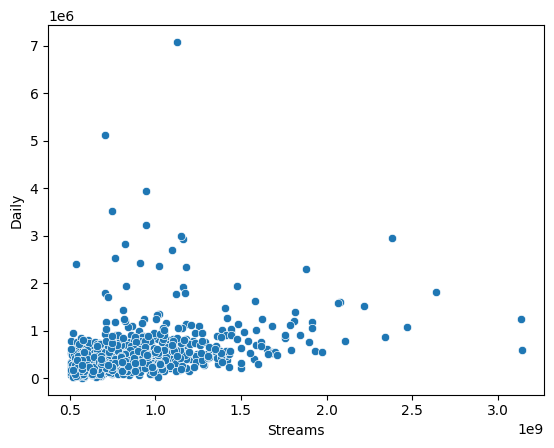

In [15]:
sns.scatterplot(x='Streams',y='Daily',data=df.groupby("Artist").agg({'Streams':'mean','Daily':'mean'}).reset_index(),markers=True)

## INFERENCE:

DAILY Streaming Activity is linearly correlated with Overall Streaming Activity, though there are a few outliers

## DATA ENCODING AND TEST, TRAIN SPLITS

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
import category_encoders as ce



Train, Test Splits

In [17]:
## We will use binary encoder to encode Artists because there are many unique artists ( more than 900)

In [18]:
binary_t=ce.BinaryEncoder(cols=['Artist'])
artists_transformed = binary_t.fit_transform(df[['Artist']])
df2 = pd.concat([df,artists_transformed],axis=1)


## 

In [19]:
df2

,Song,Artist,Streams,Daily,Artist_0,Artist_1,Artist_2,Artist_3,Artist_4,Artist_5,Artist_6,Artist_7,Artist_8,Artist_9
0,Blinding Lights,The Weeknd,4463658617,1619447.0,0,0,0,0,0,0,0,0,0,1
1,Shape of You,Ed Sheeran,4018102402,1001507.0,0,0,0,0,0,0,0,0,1,0
2,Someone You Loved,Lewis Capaldi,3588673578,1506961.0,0,0,0,0,0,0,0,0,1,1
3,As It Was,Harry Styles,3544187311,1611374.0,0,0,0,0,0,0,0,1,0,0
4,Sunflower,Post Malone,3518744128,1337404.0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,LA FALDA,Myke Towers,505592800,1278450.0,0,1,0,1,1,1,0,0,1,0
2496,Magic In The Hamptons,Social House,505511969,118483.0,1,1,1,1,1,0,0,0,0,0
2497,Rock And Roll All Nite,KISS,505386377,205701.0,0,1,0,1,1,0,0,0,1,0
2498,512,Mora,505309100,280336.0,1,0,0,0,1,0,0,0,1,0


In [20]:
df2.drop(columns=['Artist','Song'],inplace=True)

In [21]:
df2

,Streams,Daily,Artist_0,Artist_1,Artist_2,Artist_3,Artist_4,Artist_5,Artist_6,Artist_7,Artist_8,Artist_9
0,4463658617,1619447.0,0,0,0,0,0,0,0,0,0,1
1,4018102402,1001507.0,0,0,0,0,0,0,0,0,1,0
2,3588673578,1506961.0,0,0,0,0,0,0,0,0,1,1
3,3544187311,1611374.0,0,0,0,0,0,0,0,1,0,0
4,3518744128,1337404.0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,505592800,1278450.0,0,1,0,1,1,1,0,0,1,0
2496,505511969,118483.0,1,1,1,1,1,0,0,0,0,0
2497,505386377,205701.0,0,1,0,1,1,0,0,0,1,0
2498,505309100,280336.0,1,0,0,0,1,0,0,0,1,0


In [22]:
from sklearn.model_selection import train_test_split
X = df2.drop(columns=['Daily'])
y=df2['Daily']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [23]:
scaler = ColumnTransformer([("scaler",StandardScaler(),["Streams"])],remainder='passthrough')
X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
scaler = StandardScaler()
Y_train_transformed=scaler.fit_transform(y_train.values.reshape(-1,1))
Y_test_transformed=scaler.transform(y_test.values.reshape(-1,1))

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

ln = LinearRegression()
ln.fit(X_train,Y_train_transformed)
y_pred = ln.predict(X_test)
mse(y_pred,Y_test_transformed)

0.21793035490089893